<img src ="database/validation/109081.jpg">

A travers le monde, la quantité d'images ne cesse d'augmenter. Avec la généralisation des supports numériques, l'apparition de formats vidéos et photos compacts et les espaces de partage de données multimédias, on retrouve de plus en plus de documents visuels sur internet. On recense actuellement des millions d'images mises en ligne chaque jour. Aujourd'hui le véritable défi n'est plus la production de ces images mais leur indexation pour retrouver une image précise parmi une énorme quantité.


- Les méthodes de classement
- L'architecture
- Partie 1 : Analyse par attributs
    - 1.1. Indexer avec un attribut
        - 1.1.1. Database
        - 1.1.2. Evaluation
        - 1.1.3. Color
        - 1.1.4. Fonction Principale
    - 1.2. Indexer avec plusieurs attributs
        - 1.2.1. Edge
        - 1.2.2. Fusion
        - 1.2.3. Fonction principale
    - 1.3. Conclusion
- Partie 2 : Réseaux de neurones
    - 2.1. Retour sur l'architecture
    - 2.2. L'apprentissage
        - 2.2.1. Les imports
        - 2.2.2. Le redimensionnement des images
        - 2.2.3. Les couches de neurones
        - 2.2.4. L'augmentation des données
    - 2.3. L'indexation
    

# Les méthodes de classement

### Méthode "old school" : le classement par attributs

Pour indexer des images, on peut utiliser un **CBIR** (Content Based Image Retrieval, Recherche d'image par contenu). Il s'agit d'une technique permettant de rechercher des images à partir de ses caractéristiques visuelles, c'est-à-dire induite de leurs pixels. Le CBIR va automatiquement étudier les descripteurs (ou attributs) des images afin de procéder à un classement. Les attributs étudiés peuvent être les couleurs, les formes et/ou les textures présents sur l'image. 
<br>
Le principal cas d'utilisation est la recherche par l'exemple où l'on souhaite retrouver des images visuellement similaires à un exemple donné en requête.
<br><br>
Le principe général d'un CBIR comporte deux étapes:
<br><br>
Lors d'une première phase (étape d'**indexation**), on calcule les signatures des images et on les stocke dans une base de données. Lors de la phase d'indexation, le calcul de signature consiste en l'extraction de caractéristiques visuelles des images telles que:
- la **texture** (filtre de Gabor, transformée en ondelettes discrète…),
- la **couleur** (histogramme de couleurs, histogrammes dans l'espace RGB, TSV, …),
- les **formes** (descripteurs de Fourier,…),
- une combinaison de plusieurs de ces caractéristiques.

Lors de la seconde phase, dite de **recherche**, l'utilisateur soumet une image comme requête. Le système calcule la signature selon le même mode que lors de la première phase d'indexation. Ainsi, cette signature est comparée à l'ensemble des signatures préalablement stockées pour en ramener les images les plus semblables à la requête.

Une fois ces caractéristiques extraites, la comparaison consiste généralement à définir diverses distances entre ces caractéristiques, et de définir une mesure de similarité globales entre deux images. Au moyen de cette mesure de similarité et d'une image requête, on peut alors calculer l'ensemble des mesures de similarités entre cette image requête et l'ensemble des images de la base d'images. On peut alors ordonner les images de la base suivant leur score, et présenter le résultat à l'utilisateur, les images de plus grand score étant considérées comme les plus similaires. (src: wikipédia)

### Méthode "new school" : le réseau de neurones convolutif

Pour indexer des quantités d'images très importantes, on peut utiliser un réseau de neurones convolutif.
Les **réseaux de neurones convolutifs** sont à ce jour les modèles les plus performants pour classer des images. Désignés par l’acronyme CNN, de l’anglais Convolutional Neural Network, ils comportent deux parties bien distinctes. 

En entrée, une image est fournie sous la forme d’une **matrice de pixels**. Elle a 2 dimensions pour une image en niveaux de gris. La couleur est représentée par une troisième dimension, de profondeur 3 pour représenter les couleurs fondamentales.

La première partie d’un CNN est la partie convolutive. Elle fonctionne comme un **extracteur de caractéristiques** des images. Une image est passée à travers une succession de filtres, ou noyaux de convolution, créant de nouvelles images appelées cartes de convolutions. Au final, les cartes de convolutions sont mises à plat et concaténées en un vecteur de caractéristiques, appelé code CNN.

Ce code CNN en sortie de la partie convolutive est ensuite branché en entrée d’une deuxième partie, constituée de couches entièrement connectées (perceptron multicouche). Le rôle de cette partie est de **combiner les caractéristiques** du code CNN pour classer l’image.

La sortie est une dernière couche comportant un neurone par catégorie. Les valeurs numériques obtenues sont généralement normalisées entre 0 et 1, de somme 1, pour produire une distribution de probabilité sur les catégories. (extrait de "Classification d’images : les réseaux de neurones convolutifs en toute simplicité" par Julien Krywyk et Pierre-Alain Jachiet)
<br>
Il existe néanmoins deux contraintes lors de la mise en place d'un réseau de neurones:

- **Le sur-apprentissage** : en contraignant la méthode pour que la classification des données d’apprentissage suive au plus près les labels qui leur sont affectés, on la rend peu généralisable : appliquée à la base de test, la classification risque d’être peu performante.
- **Le sous-apprentissage** : en diminuant la complexité de l’algorithme ou du modèle de décision, celui-ci sera moins adapté aux données d’apprentissage, et conduira également à de faibles performances en test.

<br>Le but est alors de trouver un juste milieu pour arriver à un classement d'image performant.

# Architecture

Il existe sur Internet de nombreuses bases de données d’images. Dans ce projet nous utiliserons la **base COREL**.Elle comprend 10800 images regroupées en 80  groupes  thématiques,  pour  une  taille  totale  de  40  Mo.  Les  images  sont  de  petites dimensions (80x120 ou 120x80), ce qui permettra de réduire les temps de traitement.
Pour être complétement efficace nous choisirons parmi les classes un sous ensemble de taille réduite (de 5 à 10 classes parmi les 80 classes de la base, soit de 1000 à 2000 images environ), ce qui permettra de tester assez rapidement les méthodes d’extraction d’attributs et de classification.

La base de données se compose de quatre parties:
1. : Le **learning set** (train) contient la première partie des images de chaque classe (obj_bonsai, sc_firework, sp_ski, wl_fox).
2. : Le **test set** contient la deuxième partie des images de chaque classe. Le CBIR va s'entrainer à classer ces images.
3. : Le **validation set** contient la troisième partie des images de chaque classe. Il s'agit du jeu de données qui va être mis à l'épreuve.
4. : Le **result set** contient les résultats de l'indexation fait sur le validation test

Dans la suite, nous utiliserons seulement 4 classes contenant des images de bonsais, de feux d'artifices, de ski et de renard.

```
Analyse et Traitement d'image.ipynb
database
└───train
│   └───obj_bonsai
│   │       353000.jpg
│   │       353001.jpg
│   │       ...
│   └───sc_firework
│   │       40000.jpg
│   │       40001.jpg
│   │       ...
│   └───sp_ski
│   │       2250000.jpg
│   │       225001.jpg
│   │       ...
│   └───wl_fox
│           109000.jpg
│           109001.jpg
│           ...
└───validation
│       109064.jpg
│       109065.jpg
│       ...
└───test
│   └───obj_bonsai
│   │       353048.jpg
│   │       353049.jpg
│   │       ...
│   └───sc_firework
│   │       303012.jpg
│   │       303013.jpg
│   │       ...
│   └───sp_ski
│   │       225048.jpg
│   │       225049.jpg
│   │       ...
│   └───wl_fox
│           109064.jpg
│           109065.jpg
│           ...
└───results
    └───obj_bonsai
    │
    └───sc_firework
    │
    └───sp_ski
    │
    └───wl_fox

```
---

# Partie 1 : analyse par attributs

>Le code de base provient d'un projet OpenSource "A content-based image retrieval (CBIR) system " par Po-Chih Huang. https://github.com/pochih/CBIR . Afin de visualiser les changements dans le code, le code changé est en commentaire et les explications sont représentées par ###### explications ######

Le CBIR va utiliser les dossiers train (images modèles), validation (images à classer) et result (résultats du classement).

### Les imports
 Pour simplifier la lecture des différents codes ci-après, tout les imports seront effectués ici.

**-*- coding: utf-8 -*-** précise que l'encodage des codes sera de l'UTF-8
<br><br>
**os** : ce module fournit une manière portable d'utiliser les fonctionnalités dépendantes du système d'exploitation. On peut ainsi lire ou écrire dans un fichier, manipuler des chemins, lire toutes les lignes de tous les fichiers listés, etc.
<br><br>
**imageio** : bibliothèque qui fournit une interface simple de lire et d'écrire une large bande de données d'image.
<br><br>
**itertools** : offre de nombreuses fonctions pratiques qui permettent de faciliter le travail sur les séquences (liste, tuples, chaînes).
<br><br>
**shutil** : bibliothèque qui permet de manipuler des fichiers.
<br><br>
**numpy** : bibliothèque permettant d’effectuer des calculs numériques avec Python. Elle est destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
<br><br>
**pandas** : librairie qui permet la manipulation et l'analyse des données. Elle propose en particulier des structures de données et des opérations de manipulation de tableaux numériques et de séries temporelles. Ici on l'utilise pour manipuler/trier facilement nos index et pour écrire dans des fichiers CSV.
<br><br>
**matplotlib** : bibliothèque destinée à tracer et visualiser des données sous formes de graphiques.
<br><br>
**scipy** : projet visant à unifier et fédérer un ensemble de bibliothèques Python à usage scientifique. Il contient par exemple des modules pour l'optimisation, l'algèbre linéaire, les statistiques, le traitement du signal ou encore le traitement d'images. Il offre également des possibilités avancées de visualisation grâce au module matplotlib. 
<br><br>
**PIL** : bibliothèque de traitement d'images. Elle permet d'ouvrir, de manipuler, et de sauver différents formats de fichiers graphiques. 
<br><br>
**statistics** : bibliothèque spécialisée dans le calcul mathématique statistique.
<br><br>
**sklearn** : bibliothèque destinée à l'apprentissage automatique. Elle comprend notamment des fonctions pour estimer des algorithmes de classification par exemple.
<br><br>
**six** : bibliothèque de compatibilité Python 2 et 3. Il fournit des fonctions utilitaires pour aplanir les différences entre les versions Python dans le but d'écrire du code Python qui soit compatible avec les deux versions de Python. 

In [1]:
# -*- coding: utf-8 -*-
from __future__ import print_function

import os
import imageio
import itertools
import shutil
import scipy.misc ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from scipy import spatial
from PIL import Image
from statistics import mode
from sklearn.utils.extmath import weighted_mode
from six.moves import cPickle
from math import sqrt ##

---
# 1.1 Indexer avec un attribut
## 1.1.1 Database

Pour pouvoir indexer des données, nous avons besoin en premier lieu d'un endroit pour les stocker. La classe database permet de référencier les images que l'on souhaite évaluer. Cette classe va, pour un répertoire donné, définir trois caractéristiques: 
- la taille de la base (le nombre d'image contenu dans le répertoire)
- les noms de classes contenues dans la base
- le contenu de la base

Pour ce projet, pour pouvoir choisir quel jeu de test nous voulons étudier (parmi test, train ou validation), il a été choisi d'ajouter une caractéristique:
- le type

De plus, la classe prend désormais deux paramètres, le chemin du répertoire que l'on souhaite étudié et le fichier CSV correspondant (qui va comporter des informations sur le répertoire en base de données).

In [2]:
class Database(object):

    ###### prise en compte de l'emplacement du dossier contenant les images à évaluer ######
    #def __init__(self):
    def __init__(self, DB_dir, DB_csv):
        self._gen_csv(DB_dir, DB_csv)
        self.data = pd.read_csv(DB_csv)
        self.classes = set(self.data["cls"])
        ###### ajout d'une variable permettant de récupérer un identifiant de la database ######
        self.db_type = DB_dir[-4:]
    
    ###### prise en compte des dossiers ######
    #def _gen_csv(self):
    def _gen_csv(self, DB_dir, DB_csv):
        if os.path.exists(DB_csv):
            return
        with open(DB_csv, 'w', encoding='UTF-8') as f:
            f.write("img,cls")
            for root, _, files in os.walk(DB_dir, topdown=False):
                print(root)
                ###### split de chemin pour Linux ###### 
                #cls = root.split('/')[-1]
                ###### split de chemin pour Windows ######
                cls = root.split('\\')[-1]
                #cls = root.split('/')[-1]
                for name in files:
                    if not name.endswith('.jpg'):
                        continue
                    img = os.path.join(root, name)
                    f.write("\n{},{}".format(img, cls))

    def __len__(self):
        return len(self.data)

    def get_class(self):
        return self.classes

    def get_data(self):
        return self.data

    ###### retour de l'id de la database ######
    def get_db_type(self):
        return self.db_type

Pour tester cette classe, vous pouvez utiliser le code suivant:
<br><br>
<span style='color:red'>(n'oubliez pas de préciser vos chemins vers votre base si votre architecture de dossiers est différente)</span>

In [4]:
#sélection du répertoire et du csv
DB_train_dir = 'database/validation'
DB_train_csv = 'data_validation.csv'

db = Database(DB_train_dir,DB_train_csv)
#on récupère les données contenues dans le dossier
data = db.get_data()
#on récupère les noms de classes
classes = db.get_class()

#on affiche les infos
print("taille de la base:", len(db))
print("classes contenues dans la base:",classes)
print("contenu de la base:",data)

taille de la base: 229
classes contenues dans la base: {'database/validation'}
contenu de la base:                                 img                  cls
0    database/validation/303029.jpg  database/validation
1    database/validation/303013.jpg  database/validation
2    database/validation/353071.jpg  database/validation
3    database/validation/303045.jpg  database/validation
4    database/validation/303024.jpg  database/validation
..                              ...                  ...
224  database/validation/225057.jpg  database/validation
225  database/validation/353050.jpg  database/validation
226  database/validation/353051.jpg  database/validation
227  database/validation/303083.jpg  database/validation
228  database/validation/303087.jpg  database/validation

[229 rows x 2 columns]


---
## 1.1.2. Evaluation
Cette classe contient les fonctions permettant d'indexer des images à partir de leurs caractéristiques. Plus précisément cette fonction retourne la précision moyenne d'une image pour une classe. Pour classer les images on utilise la " **MAP** " (Mean Average Precision) qui permet de comparer des images parmi un jeu de données. La formule est: MMAP = (class1.MAP + class2.MAP + ... + classN.MAP) / N, où N est le nombre de classes d'images.
<br><br>
La précision moyenne **AP** (Average Precision) pour une requête est la moyenne des précisions obtenues chaque fois qu’une image pertinente est retrouvée. La MAP pour un jeu de données est la moyenne des précisions moyennes obtenues sur un ensemble de requête.
<br><br>La classe Evaluation possède plusieurs méthodes:
<br><br> La **méthode evaluate** permet de préparer l'analyse des images. Elle sélectionne une image modèle puis des échantillons d'images (samples) à comparer. Le paramètre **depth** est égal au nombre d'images les plus ressemblantes au modèle.
<br><br> La **méthode infer** retourne la précision moyenne et les images les plus ressemblantes à l'image modèle. Avant de modifier le code la précision était donnée par: AP = (hit1.precision + hit2.precision + ... + hitH.precision) / H, où H est le nombre d'images.
<br><br> La **méthode AP** retourne la précision moyenne entre une image et des images d'une classe particulière. Pour les besoins du projet, on a choisi de ne pas retourner la précision elle-même mais si elle est supérieur à 0.5 (soit que les images se ressemblent au minimum à 50%).

In [5]:
class Evaluation(object):

    def make_samples(self):
        raise NotImplementedError("Needs to implemented this method")

    #on récupère la distance entre deux vecteurs
    def distance(v1, v2, d_type='d1'):
        assert v1.shape == v2.shape, "shape of two vectors need to be same!"

        if d_type == 'd1':
            return np.sum(np.absolute(v1 - v2))
        elif d_type == 'd2':
            return np.sum((v1 - v2) ** 2)
        elif d_type == 'd2-norm':
            return 2 - 2 * np.dot(v1, v2)
        elif d_type == 'd3':
            pass
        elif d_type == 'd4':
            pass
        elif d_type == 'd5':
            pass
        elif d_type == 'd6':
            pass
        elif d_type == 'd7':
            return 2 - 2 * np.dot(v1, v2)
        elif d_type == 'd8':
            return 2 - 2 * np.dot(v1, v2)
        elif d_type == 'cosine':
            return spatial.distance.cosine(v1, v2)
        elif d_type == 'square':
            return np.sum((v1 - v2) ** 2)

    #retourne si la précision est élevée ou non
    def AP(label, results, sort=True):
        ''' infer a query, return it's ap
        arguments
            label  : query's class
            results: a dict with two keys, see the example below
            {
                'dis': <distance between sample & query>,
                'cls': <sample's class>
            }
            sort   : sort the results by distance
        '''
        if sort:
            results = sorted(results, key=lambda x: x['dis'])
        precision = []
        hit = 0
        for i, result in enumerate(results):
            if result['cls'] == label:
                
            ###### on ne retourne plus la précision en elle-même mais si elle est élevée ou non ###### 
            ###### le tableau de précision contiendra des 0 ou des 1 ######
            
            #hit += 1
                #precision.append(hit / (i+1.))
            #if hit == 0:
                #return 0.
            #return np.mean(precision)
                hit = 1
                precision.append(hit)
        return (np.mean(precision)>0.5)
    
    #compare une image modèle à un échantillon d'autre images
    def infer(query, samples=None, db=None, sample_db_fn=None, depth=None, d_type='d1'):
        ''' infer a query, return it's ap
        arguments
            query       : a dict with three keys, see the template
            {
                'img': <path_to_img>,
                'cls': <img class>,
                'hist' <img histogram>
            }
            samples     : a list of 
            {
                'img': <path_to_img>,
                'cls': <img class>,
                'hist' <img histogram>
            }
            db          : an instance of class Database
            sample_db_fn: a function making samples, should be given if Database != None
            depth       : retrieved depth during inference, the default depth is equal to database size
            d_type      : distance type
        '''
        assert samples != None or (db != None and sample_db_fn != None), "need to give either samples or db plus sample_db_fn"
        if db:
            samples = sample_db_fn(db)

        q_img, q_cls, q_hist = query['img'], query['cls'], query['hist']
        results = []
        for idx, sample in enumerate(samples):
            s_img, s_cls, s_hist = sample['img'], sample['cls'], sample['hist']
            #on vérifie que l'image étudiée n'est pas l'image modèle
            if q_img == s_img:
                continue
            results.append({
                'img':s_img,
                'dis': Evaluation.distance(q_hist, s_hist, d_type=d_type),
                'cls': s_cls
            })
        #on classe les images dans un tableau de l'image avec la plus petite distance à la plus grande
        results = sorted(results, key=lambda x: x['dis'])
        if depth and depth <= len(results):
            results = results[:depth]
            print("image modèle:",q_img)
            
            #liste contenant uniquement les chemins des images
            list_im = [ sub['img'] for sub in results]
            print(list_im)

            ###### pour distinguer des images qui auraient la même distance on leur attribue un poids ######
            pred = [sub['cls'] for sub in results ]
            weight = [sub['dis'] for sub in results ]
            weight = np.reciprocal(weight)
            #pred = mode(pred)
            pred2 = weighted_mode(pred, weight)
            pred = np.array_str(pred2[0])[2:-2]

            ###### affichage des quatres images les plus ressemblantes à l'image modèle ######
            list_im.insert(0, q_img)
            imgs = [Image.open(i) for i in list_im]
            min_shape = sorted([(np.sum(i.size), i.size) for i in imgs])[0][1]
            imgs_comb = np.hstack((np.asarray(i.resize(min_shape)) for i in imgs))
            plt.imshow(imgs_comb/255.)
            plt.pause(2)
            plt.close()

        ap = Evaluation.AP(q_cls, results, sort=False)
        return ap, results

    #On étudie les databases entièrement, en utilisant des échantillons (samples)
    
    #### On souhaite évaluer les images présentes entre deux dossiers  ####
    #### ajout d'un paramètre pour prendre en compte une 2e base ####
    #def evaluate(db, sample_db_fn, depth=None, d_type='d1'):
    
    def evaluate(db, db2, sample_db_fn, depth=None, d_type='d1'):
        ''' infer the whole database
        arguments
            db          : an instance of class Database
            sample_db_fn: a function making samples, should be given if Database != None
            depth       : retrieved depth during inference, the default depth is equal to database size
            d_type      : distance type
        '''
        #classes = db.get_class()
        #ret = {c: [] for c in classes}

        #samples = sample_db_fn(db)
        #for query in samples:
        #ap, _ = infer(query, samples=samples, depth=depth, d_type=d_type)
        #ret[query['cls']].append(ap)
        #return ret

        samples = sample_db_fn(db)
        print(len(samples))

        #### on prend en compte les échantillons de la 2e base ####
        samples2 = sample_db_fn(db2)
        print(len(samples2))

        classes = db.get_class()
        classes.add(samples2[0]['cls'])
        print(classes)

        ret = {c: [] for c in classes}

        predict = []

        i=0
        for query in samples2:
            i+=1
            print(i)
            ap, pred = Evaluation.infer(query, samples=samples, depth=depth, d_type=d_type)
            #ap, _ = infer(query, samples=samples, depth=depth, d_type=d_type)
            ret[query['cls']].append(ap)
            predict.append(pred)

        return ret, predict

---
## 1.1.3. Color

La classe Color permet de définir des caractéristiques basées sur les couleurs d'une image. C'est à partir de ces caractéristiques que l'indexation se fera dans la classe Evaluation. On utilisera comme caractéristique précipale, l'histogramme de couleurs.

En imagerie numérique, l’histogramme représente la distribution des intensités (ou des couleurs) de l'image. C'est un outil fondamental du traitement d'images.

In [6]:
#configs for histogram
n_bin   = 12        # histogram bins
n_slice = 3         # slice image
h_type  = 'region'  # global or region
d_type  = 'd1'      # distance type

depth   = 4         # profondeur (nb images correspondantes)

Pour que le code fonctionne correctement il faut penser à vider le cache et le dossier result.
<br><br>
<span style='color:red'>(n'oubliez pas de préciser vos chemins vers votre base si votre architecture de dossiers est différente)</span>

In [7]:
# cache dir
cache_dir = 'cache'
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)
    
# supression du cache
  
#shutil.rmtree("__pycache__")
#shutil.rmtree("cache")
#os.remove("data_test2.csv")
#os.remove("data_test.csv")
#os.remove("data_train.csv")

# supression des fichiers dans le dossier result
      
for filename in os.listdir("database/results/obj_bonsai") :
    os.remove("database/results/obj_bonsai" + "/" + filename)

for filename in os.listdir("database/results/sc_firewrk") :
    os.remove("database/results/sc_firewrk" + "/" + filename)
    
for filename in os.listdir("database/results/sp_ski") :
    os.remove("database/results/sp_ski" + "/" + filename)
    
for filename in os.listdir("database/results/wl_fox") :
    os.remove("database/results/wl_fox" + "/" + filename)

In [8]:
class Color(object):

    def histogram(self, input, n_bin=n_bin, type=h_type, n_slice=n_slice, normalize=True):
        ''' count img color histogram
            arguments
                input    : a path to a image or a numpy.ndarray
                n_bin    : number of bins for each channel
                type     : 'global' means count the histogram for whole image
                       'region' means count the histogram for regions in images, then concatanate all of them
                n_slice  : work when type equals to 'region', height & width will equally sliced into N slices
                normalize: normalize output histogram

            return
                type == 'global'
                    a numpy array with size n_bin ** channel
                type == 'region'
                    a numpy array with size n_slice * n_slice * (n_bin ** channel)
        '''

        if isinstance(input, np.ndarray):  # examinate input type
            img = input.copy()
        else:
            #### lecture de l'image, souci de compatibilité ####
            #img = scipy.misc.imread(input, mode='RGB')
            img = imageio.imread(input)
        height, width, channel = img.shape
        bins = np.linspace(0, 256, n_bin+1, endpoint=True)  # slice bins equally for each channel

        if type == 'global':
            hist = self._count_hist(img, n_bin, bins, channel)

        elif type == 'region':
            hist = np.zeros((n_slice, n_slice, n_bin ** channel))
            h_silce = np.around(np.linspace(0, height, n_slice+1, endpoint=True)).astype(int)
            w_slice = np.around(np.linspace(0, width, n_slice+1, endpoint=True)).astype(int)

            for hs in range(len(h_silce)-1):
                for ws in range(len(w_slice)-1):
                    img_r = img[h_silce[hs]:h_silce[hs+1], w_slice[ws]:w_slice[ws+1]]  # slice img to regions
                    hist[hs][ws] = self._count_hist(img_r, n_bin, bins, channel)

        if normalize:
            hist /= np.sum(hist)

        return hist.flatten()
  
    def _count_hist(self, input, n_bin, bins, channel):
        img = input.copy()
        bins_idx = {key: idx for idx, key in enumerate(itertools.product(np.arange(n_bin), repeat=channel))}  # permutation of bins
        hist = np.zeros(n_bin ** channel)
  
        # cluster every pixels
        for idx in range(len(bins)-1):
            img[(input >= bins[idx]) & (input < bins[idx+1])] = idx
        # add pixels into bins
        height, width, _ = img.shape
        for h in range(height):
            for w in range(width):
                b_idx = bins_idx[tuple(img[h,w])]
                hist[b_idx] += 1
        return hist
  
    def make_samples(self, db, verbose=True):
        #### ajout de la classe de l'image dans l'échantillon ####
        mystr = db.get_db_type()

        if h_type == 'global':
            #sample_cache = "histogram_cache-{}-n_bin{}".format(h_type, n_bin)
            sample_cache = "histogram_cache-{}-n_bin{}".format(h_type, n_bin, mystr)
        elif h_type == 'region':
            sample_cache = "histogram_cache-{}-n_bin{}-n_slice{}".format(h_type, n_bin, n_slice)

        try:
            samples = cPickle.load(open(os.path.join(cache_dir, sample_cache), "rb", True))
            if verbose:
                print("Using cache..., config=%s, distance=%s, depth=%s" % (sample_cache, d_type, depth))
        except:
            if verbose:
                print("Counting histogram..., config=%s, distance=%s, depth=%s" % (sample_cache, d_type, depth))
            samples = []
            data = db.get_data()
            for d in data.itertuples():
                d_img, d_cls = getattr(d, "img"), getattr(d, "cls")
                d_hist = self.histogram(d_img, type=h_type, n_bin=n_bin, n_slice=n_slice)
                samples.append({
                    'img':  d_img, 
                    'cls':  d_cls, 
                    'hist': d_hist
                })
            cPickle.dump(samples, open(os.path.join(cache_dir, sample_cache), "wb", True))

        return samples

## 1.1.4. Fonction principale

C'est ici que l'on va exécuter notre code principal. On commence par définir deux databases, celle d'entrainement qui servira de modèle et celle de validation dont le but est d'ordonner les images correctement dans result.
<br><br>
Après avoir extrait les caractéristiques issues des couleurs des images on évalue les images à l'aide la classe Evaluation pour les indexer correctement.
<br><br> 
En sortie on obtiendra l'affichage des 4 images les plus ressemblantes à un modèle. Pour accélérer le traitement, il suffit de commenter l'affichage des images dans la fonction Evaluation.infer. 
<span style='color:red'>Nous conseillons de l'exécuter une fois pour se donner une idée de l'évaluation des images, de l'arrêter, de commenter les lignes, puis de relancer l'exécution pour avoir les résultats finaux. </span>

Taille de la base 1: 272
Taille de la base 2: 229
Using cache..., config=histogram_cache-region-n_bin12-n_slice3, distance=d1, depth=4
272
Using cache..., config=histogram_cache-region-n_bin12-n_slice3, distance=d1, depth=4
272
{'database/train/sp_ski', 'database/train/wl_fox', 'database/train/sc_firewrk', 'database/train/obj_bonsai'}
1
image modèle: database/train/sc_firewrk/40027.jpg
['database/train/sc_firewrk/40052.jpg', 'database/train/sc_firewrk/40047.jpg', 'database/train/sc_firewrk/40040.jpg', 'database/train/sc_firewrk/40031.jpg']


/home/emma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:123: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


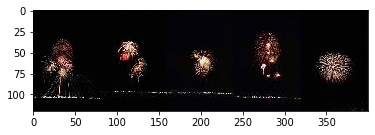

KeyboardInterrupt: 

In [10]:
#### on ferme les éventuels restes graphiques ####
plt.close('all')

#### on précise quelles bases on souhaite évaluer ####
#db = Database()
#data = db.get_data()
DB_train_dir = 'database/train'
DB_train_csv = 'data_train.csv'
    
db = Database(DB_train_dir,DB_train_csv)
print("Taille de la base 1:",len(db))
    
color = Color()
  
DB_test_dir = 'database/validation'
DB_test_csv = 'data_validation.csv'
      
db2 = Database(DB_test_dir, DB_test_csv)
print("Taille de la base 2:",len(db2))
  
#########################################################
# Liste de tests par défaut pour tester la classe COLOR 
#
#  db = Database(DB_train_dir, DB_train_csv)
#  data = db.get_data()
#  # test normalize
#  hist = color.histogram(data.ix[0,0], type='global')
#  assert hist.sum() - 1 < 1e-9, "normalize false"
#
#  # test histogram bins
#  def sigmoid(z):
#    a = 1.0 / (1.0 + np.exp(-1. * z))
#    return a
#  np.random.seed(0)
#  IMG = sigmoid(np.random.randn(2,2,3)) * 255
#  IMG = IMG.astype(int)
#  hist = color.histogram(IMG, type='global', n_bin=4)
#  assert np.equal(np.where(hist > 0)[0], np.array([37, 43, 58, 61])).all(), "global histogram implement failed"
#  hist = color.histogram(IMG, type='region', n_bin=4, n_slice=2)
#  assert np.equal(np.where(hist > 0)[0], np.array([58, 125, 165, 235])).all(), "region histogram implement failed"

#  # examinate distance
#  np.random.seed(1)
#  IMG = sigmoid(np.random.randn(4,4,3)) * 255
#  IMG = IMG.astype(int)
#  hist = color.histogram(IMG, type='region', n_bin=4, n_slice=2)
#  IMG2 = sigmoid(np.random.randn(4,4,3)) * 255
#  IMG2 = IMG2.astype(int)
#  hist2 = color.histogram(IMG2, type='region', n_bin=4, n_slice=2)
#  assert distance(hist, hist2, d_type='d1') == 2, "d1 implement failed"
#  assert distance(hist, hist2, d_type='d2-norm') == 2, "d2 implement failed"
#########################################################

#### On évalue les databases pour pouvoir indexer les images ####
#APs = evaluate_class(db, f_class=Color, d_type=d_type, depth=depth)
APs, res = Evaluation.evaluate(db, db2, color.make_samples, depth=depth, d_type=d_type)
cls_MAPs = []
for cls, cls_APs in APs.items():
    MAP = np.mean(cls_APs)
    print("Class {}, MAP {}".format(cls, MAP))
    cls_MAPs.append(MAP)
    print("MMAP", np.mean(cls_MAPs))
    
#### On sauvegarde les résultats dans le dossier result ####
for i in range(len(db2)):
        saveName = "database/results/" + res[i] + "/" + db2.data.img[i].split("/")[-1]
        bid = imageio.imread(db2.data.img[i])
        mpimg.imsave(saveName, bid/255.)

---
# Résultats

`
Class database/train/sc_firewrk, MAP 1.0
Class database/train/wl_fox, MAP 0.96875
Class database/train/sp_ski, MAP 0.9583333333333
Class database/train/oj_bonsai, MAP 0.97916666
MMAP 0.9765625`

Voici ci-dessous deux résultats après traitement. On peut voir que traitement n'est pas parfait car les couleurs des deux classes choisies sont très proches (un renard et un bonsai possède tout deux des touches de brun).
<br><br>
267<br>
image modèle:  ../database/train/obj_bonsai/353004.jpg<br>
['../database/train/obj_bonsai/353006.jpg', '../database/train/obj_bonsai/353005.jpg', '../database/train/wl_fox/109028.jpg', '../database/train/obj_bonsai/353002.jpg']<br>
<img src ="capture_resultat.png">
268<br>
image modèle:  ../database/train/obj_bonsai/353017.jpg<br>
['../database/train/obj_bonsai/353015.jpg', '../database/train/obj_bonsai/353028.jpg', '../database/train/obj_bonsai/353027.jpg', '../database/train/obj_bonsai/353034.jpg']<br>
<img src ="capture_resultat(2).png">

---
# 1.2. Indexer avec plusieurs attributs

Pour améliorer le taux d'indexation correct, il est possible de combiner deux caractéristiques.

La classe Fusion prend en compte d'autres classes permettant de trouver différentes caractéristiques. On peut choisir d'étudier les couleurs avec color, les textures avec gabor, les formes avec daisy, edge ou HOG. VGG et Res sont des ébauches de réseaux de neurones que nous verrons en deuxième partie. Ces classes se trouvent dans le dossier src contenant les codes sources du projet, il n'a pas été jugé utile de les inclure dans le notebook.

Nous allons étudié l'indexation suivant deux caractéristiques: les couleurs et les formes en utilisant la classe Color et la classe Edge.

## 1.2.1 Edge

In [11]:
#configs
stride = (1, 1)
n_slice  = 10
h_type   = 'region'
d_type   = 'cosine'

depth    = 5

edge_kernels = np.array([
  [
   # vertical
   [1,-1], 
   [1,-1]
  ],
  [
   # horizontal
   [1,1], 
   [-1,-1]
  ],
  [
   # 45 diagonal
   [sqrt(2),0], 
   [0,-sqrt(2)]
  ],
  [
   # 135 diagnol
   [0,sqrt(2)], 
   [-sqrt(2),0]
  ],
  [
   # non-directional
   [2,-2], 
   [-2,2]
  ]
])

# cache dir
cache_dir = 'cache'
if not os.path.exists(cache_dir):
  os.makedirs(cache_dir)

In [12]:
class Edge(object):

    def histogram(self, input, stride=(2, 2), type=h_type, n_slice=n_slice, normalize=True):
        ''' count img histogram

        arguments
            input    : a path to a image or a numpy.ndarray
            stride   : stride of edge kernel
            type     : 'global' means count the histogram for whole image
                       'region' means count the histogram for regions in images, then concatanate all of them
            n_slice  : work when type equals to 'region', height & width will equally sliced into N slices
            normalize: normalize output histogram

        return
            type == 'global'
                a numpy array with size len(edge_kernels)
            type == 'region'
                a numpy array with size len(edge_kernels) * n_slice * n_slice
        '''
        if isinstance(input, np.ndarray):  # examinate input type
            img = input.copy()
        else:
            img = imageio.imread(input, pilmode = "RGB")
        height, width, channel = img.shape

        if type == 'global':
            hist = self._conv(img, stride=stride, kernels=edge_kernels)

        elif type == 'region':
            hist = np.zeros((n_slice, n_slice, edge_kernels.shape[0]))
            h_silce = np.around(np.linspace(0, height, n_slice+1, endpoint=True)).astype(int)
            w_slice = np.around(np.linspace(0, width, n_slice+1, endpoint=True)).astype(int)

            for hs in range(len(h_silce)-1):
                for ws in range(len(w_slice)-1):
                    img_r = img[h_silce[hs]:h_silce[hs+1], w_slice[ws]:w_slice[ws+1]]  # slice img to regions
                    hist[hs][ws] = self._conv(img_r, stride=stride, kernels=edge_kernels)
        if normalize:
            hist /= np.sum(hist)
  
        return hist.flatten()
  
  
    def _conv(self, img, stride, kernels, normalize=True):
        H, W, C = img.shape
        conv_kernels = np.expand_dims(kernels, axis=3)
        conv_kernels = np.tile(conv_kernels, (1, 1, 1, C))
        assert list(conv_kernels.shape) == list(kernels.shape) + [C]  # check kernels size

        sh, sw = stride
        kn, kh, kw, kc = conv_kernels.shape

        hh = int((H - kh) / sh + 1)
        ww = int((W - kw) / sw + 1)

        hist = np.zeros(kn)

        for idx, k in enumerate(conv_kernels):
            for h in range(hh):
                hs = int(h*sh)
                he = int(h*sh + kh)
                for w in range(ww):
                    ws = w*sw
                    we = w*sw + kw
                    hist[idx] += np.sum(img[hs:he, ws:we] * k)  # element-wise product
  
        if normalize:
            hist /= np.sum(hist)
      
        return hist
  
  
    def make_samples(self, db, verbose=True):
        if h_type == 'global':
            sample_cache = "edge-{}-stride{}".format(h_type, stride)
        elif h_type == 'region':
            sample_cache = "edge-{}-stride{}-n_slice{}".format(h_type, stride, n_slice)
        
        try:
            samples = cPickle.load(open(os.path.join(cache_dir, sample_cache), "rb", True))
            for sample in samples:
                sample['hist'] /= np.sum(sample['hist'])  # normalize
            if verbose:
                print("Using cache..., config=%s, distance=%s, depth=%s" % (sample_cache, d_type, depth))
        except:
            if verbose:
                print("Counting histogram..., config=%s, distance=%s, depth=%s" % (sample_cache, d_type, depth))
  
        samples = []
        data = db.get_data()
        for d in data.itertuples():
            d_img, d_cls = getattr(d, "img"), getattr(d, "cls")
            d_hist = self.histogram(d_img, type=h_type, n_slice=n_slice)
            samples.append({
                'img':  d_img,
                'cls':  d_cls, 
                'hist': d_hist
            })
        cPickle.dump(samples, open(os.path.join(cache_dir, sample_cache), "wb", True))
        
        return samples

Pour tester cette classe, vous pouvez utiliser le code suivant:

<span style='color:red'>(n'oubliez pas de préciser vos chemins vers votre base si votre architecture de dossiers est différente)</span>

In [ ]:
# cache dir
cache_dir = 'cache'
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)
    
# supression du cache
  
#shutil.rmtree("__pycache__")
#shutil.rmtree("cache")
#os.remove("data_test2.csv")
#os.remove("data_test.csv")
#os.remove("data_train.csv")

# supression des fichiers dans le dossier result
      
for filename in os.listdir("database/results/obj_bonsai") :
    os.remove("database/results/obj_bonsai" + "/" + filename)

for filename in os.listdir("database/results/sc_firewrk") :
    os.remove("database/results/sc_firewrk" + "/" + filename)
    
for filename in os.listdir("database/results/sp_ski") :
    os.remove("database/results/sp_ski" + "/" + filename)
    
for filename in os.listdir("database/results/wl_fox") :
    os.remove("database/results/wl_fox" + "/" + filename)

In [13]:
#### on ferme les éventuels restes graphiques ####
plt.close('all')

#### on précise quelles bases on souhaite évaluer ####
#db = Database()
#data = db.get_data()
DB_train_dir = 'database/train'
DB_train_csv = 'data_train.csv'
    
db = Database(DB_train_dir,DB_train_csv)
print("Taille de la base 1:",len(db))
    
edge = Edge()
  
DB_test_dir = 'database/test'
DB_test_csv = 'data_test.csv'
      
db2 = Database(DB_test_dir, DB_test_csv)
print("Taille de la base 2:",len(db2))

# check shape
assert edge_kernels.shape == (5, 2, 2)

#### On évalue les databases pour pouvoir indexer les images ####
#APs = evaluate_class(db, f_class=Edge, d_type=d_type, depth=depth)
APs = Evaluation.evaluate(db, db2, edge.make_samples, depth=depth, d_type=d_type)
cls_MAPs = []
for cls, cls_APs in APs.items():
    MAP = np.mean(cls_APs)
    print("Class {}, MAP {}".format(cls, MAP))
    cls_MAPs.append(MAP)
    print("MMAP", np.mean(cls_MAPs))
    
#### On sauvegarde les résultats dans le dossier result ####
for i in range(len(db2)):
    saveName = "database/result/" + res[i] + "/" + db2.data.img[i].split("/")[-1]
    bid = imageio.imread(db2.data.img[i])
    mpimg.imsave(saveName, bid/255.)

Taille de la base 1: 272
Taille de la base 2: 229
Counting histogram..., config=edge-region-stride(1, 1)-n_slice10, distance=cosine, depth=5


/home/emma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide
/home/emma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in true_divide
/home/emma/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


KeyboardInterrupt: 

---
## 1.2.2 Fusion

In [14]:
#configs
d_type   = 'd1'
depth    = 30

#on choisi quelles caractéristiques on souhaite évaluer.
#feat_pools = ['color', 'daisy', 'edge', 'gabor', 'hog', 'vgg', 'res']
feat_pools = ['color', 'edge']

# result dir
result_dir = 'result'
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

In [15]:
class FeatureFusion(object):

    def __init__(self, features):
        assert len(features) > 1, "need to fuse more than one feature!"
        self.features = features
        self.samples  = None

    def make_samples(self, db, verbose=False):
        if verbose:
            print("Use features {}".format(" & ".join(self.features)))

        if self.samples == None:
            feats = []
        for f_class in self.features:
            feats.append(self._get_feat(db, f_class))
            samples = self._concat_feat(db, feats)
            self.samples = samples  # cache the result
        return self.samples

    def _get_feat(self, db, f_class):
        if f_class == 'color':
            f_c = Color()
        #elif f_class == 'daisy':
        #    f_c = Daisy()
        elif f_class == 'edge':
            f_c = Edge()
        #elif f_class == 'gabor':
        #    f_c = Gabor()
        #elif f_class == 'hog':
        #    f_c = HOG()
        #elif f_class == 'vgg':
        #    f_c = VGGNetFeat()
        #elif f_class == 'res':
        #    f_c = ResNetFeat()
        return f_c.make_samples(db, verbose=False)

    def _concat_feat(self, db, feats):
        samples = feats[0]
        delete_idx = []
        for idx in range(len(samples)):
            for feat in feats[1:]:
                feat = self._to_dict(feat)
                key = samples[idx]['img']
            if key not in feat:
                delete_idx.append(idx)
                continue
        assert feat[key]['cls'] == samples[idx]['cls']
        samples[idx]['hist'] = np.append(samples[idx]['hist'], feat[key]['hist'])
        for d_idx in sorted(set(delete_idx), reverse=True):
            del samples[d_idx]
        if delete_idx != []:
            print("Ignore %d samples" % len(set(delete_idx)))

        return samples

    def _to_dict(self, feat):
        ret = {}
        for f in feat:
            ret[f['img']] = {
                'cls': f['cls'],
                'hist': f['hist']
        }
        return ret

    def evaluate_feats(db, db2, N, feat_pools=feat_pools, d_type='d1', depths=[None, 300, 200, 100, 50, 30, 10, 5, 3, 1]):
        result = open(os.path.join(result_dir, 'feature_fusion-{}-{}feats.csv'.format(d_type, N)), 'w')
        for i in range(N):
            result.write("feat{},".format(i))
            result.write("depth,distance,MMAP")
            combinations = itertools.combinations(feat_pools, N)
            for combination in combinations:
                fusion = FeatureFusion(features=list(combination))
    for d in depths:
        APs = evaluate_class(db, db2, f_instance=fusion, depth=depth, d_type=d_type)
        cls_MAPs = []
        for cls, cls_APs in APs.items():
            MAP = np.mean(cls_APs)
            cls_MAPs.append(MAP)
        r = "{},{},{},{}".format(",".join(combination), d, d_type, np.mean(cls_MAPs))
        print(r)
        result.write('\n'+r)
        print()
    result.close()


NameError: name 'depths' is not defined

## 1.2.3. Fonction principale

C'est ici que l'on va exécuter notre code principal. On commence par définir deux databases, celle d'entrainement qui servira de modèle et celle de validation dont le but est d'ordonner les images correctement dans result.
<br><br>
Après avoir extrait les caractéristiques issues des couleurs et des formes des images on évalue les images à l'aide la classe Evaluation pour les indexer correctement.
<br><br> 
En sortie on obtiendra l'affichage des 4 images les plus ressemblantes à un modèle. our accélérer le traitement, il suffit de commenter l'affichage des images dans la fonction Evaluation.infer. 
<span style='color:red'>Nous conseillons de l'exécuter une fois pour se donner une idée de l'évaluation des images, de l'arrêter, de commenter les lignes, puis de relancer l'exécution pour avoir les résultats finaux. </span>

In [ ]:
#### on ferme les éventuels restes graphiques ####
plt.close('all')

#### on précise quelles bases on souhaite évaluer ####
#db = Database()
#data = db.get_data()
DB_train_dir = 'database/train'
DB_train_csv = 'data_train.csv'
    
db = Database(DB_train_dir,DB_train_csv)
print("Taille de la base 1:",len(db))
  
DB_test_dir = 'database/test'
DB_test_csv = 'data_test.csv'
      
db2 = Database(DB_test_dir, DB_test_csv)
print("Taille de la base 2:",len(db2))

# evaluate features double-wise
FeatureFusion.evaluate_feats(db, db2, N=2, d_type='d1')

# evaluate features triple-wise
FeatureFusion.valuate_feats(db, db2, N=3, d_type='d1')
  
# evaluate features quadra-wise
FeatureFusion.valuate_feats(db, db2, N=4, d_type='d1')

# evaluate features penta-wise
FeatureFusion.valuate_feats(db, db2, N=5, d_type='d1')

# evaluate features hexa-wise
FeatureFusion.valuate_feats(db, db2, N=6, d_type='d1')

# evaluate features hepta-wise
FeatureFusion.valuate_feats(db, db2, N=7, d_type='d1')
  
# evaluate database
fusion = FeatureFusion(features=['color', 'edge'])
APs = Evaluation.evaluate(db, db2, f_instance=fusion, depth=depth, d_type=d_type)
cls_MAPs = []
for cls, cls_APs in APs.items():
    MAP = np.mean(cls_APs)
    print("Class {}, MAP {}".format(cls, MAP))
    cls_MAPs.append(MAP)
    print("MMAP", np.mean(cls_MAPs))
    
#### On sauvegarde les résultats dans le dossier result ####
for i in range(len(db2)):
    saveName = "database/result/" + res[i] + "/" + db2.data.img[i].split("/")[-1]
    bid = imageio.imread(db2.data.img[i])
    mpimg.imsave(saveName, bid/255.)

---
# Résultats

`
Class database/train/sc_firewrk, MAP 1.0
Class database/train/wl_fox, MAP 0.96875
Class database/train/sp_ski, MAP 0.9583333333333
Class database/train/oj_bonsai, MAP 0.97916666
MMAP 0.9765625`

Voici ci-dessous deux résultats après traitement. On peut voir que traitement n'est pas parfait car les couleurs des deux classes choisies sont très proches (un renard et un bonsai possède tout deux des touches de brun).
<br><br>
267<br>
image modèle:  ../database/train/obj_bonsai/353004.jpg<br>
['../database/train/obj_bonsai/353006.jpg', '../database/train/obj_bonsai/353005.jpg', '../database/train/wl_fox/109028.jpg', '../database/train/obj_bonsai/353002.jpg']<br>
<img src ="capture_resultat.png">
268<br>
image modèle:  ../database/train/obj_bonsai/353017.jpg<br>
['../database/train/obj_bonsai/353015.jpg', '../database/train/obj_bonsai/353028.jpg', '../database/train/obj_bonsai/353027.jpg', '../database/train/obj_bonsai/353034.jpg']<br>
<img src ="capture_resultat(2).png">

# Conclusion



Dans chaque cas on observe une précision moyenne comprise entre 0.95 et 1. On peut cependant visualiser les résultats directement dans le dossier result.